In [1]:
import torch
from models import DDPG_Policy_Network, DDPG_Value_Network
from utils import Environment, ReplayBuffer, plot_results
from agent import Agent
import numpy as np

# Multi-agent DDPG

In [2]:
config = {'lr': 0.001, 'alpha': 0.01, 'update_freq': 10, 'gamma': 0.99,
          'tau': 0.001, 'max_nr_steps': 2000, 'n_agents': 2, 'nr_updates': 10, 'noise_scale_init': 1,
         'nr_episodes': 2000, 'noise_scale_min': 0.01, 'noise_decl': 0.995, 
         'output_freq': 100, 'action_boundaries': [-1, 1]}

In [3]:
tennisWorld = Environment('unity_vector', 'Tennis.app', n_agents=config['n_agents'])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
online_value_network = DDPG_Value_Network(tennisWorld.observation_space_size, tennisWorld.action_space_size,
                    seed=0, hidden_layers=[128,128])
target_value_network = DDPG_Value_Network(tennisWorld.observation_space_size, tennisWorld.action_space_size,
                     seed=0, hidden_layers=[128,128])
online_policy_network = DDPG_Policy_Network(tennisWorld.observation_space_size, tennisWorld.action_space_size,
                    seed=0, hidden_layers=[128,128])
target_policy_network = DDPG_Policy_Network(tennisWorld.observation_space_size, tennisWorld.action_space_size,
                     seed=0, hidden_layers=[128,128])
memory = ReplayBuffer(buffer_size=100000, batch_size=256, seed=0)
player = Agent(online_value_network, target_value_network, online_policy_network, target_policy_network,
               tennisWorld, memory, config, train_mode=True)

In [6]:
results = player.train()

finished episodes 1 - 100 in 49.863059282302856 s. with avg reward 0.09
finished episodes 101 - 200 in 52.54570984840393 s. with avg reward 0.1
finished episodes 201 - 300 in 57.579754114151 s. with avg reward 0.11
finished episodes 301 - 400 in 61.85454988479614 s. with avg reward 0.11
finished episodes 401 - 500 in 63.28250288963318 s. with avg reward 0.11
finished episodes 501 - 600 in 82.11938095092773 s. with avg reward 0.14
finished episodes 601 - 700 in 80.07841300964355 s. with avg reward 0.13
finished episodes 701 - 800 in 119.90291118621826 s. with avg reward 0.2
finished episodes 801 - 900 in 295.35910511016846 s. with avg reward 0.49
finished episodes 901 - 1000 in 197.33229684829712 s. with avg reward 0.33
finished episodes 1001 - 1100 in 356.0340459346771 s. with avg reward 0.59
finished episodes 1101 - 1200 in 567.8021099567413 s. with avg reward 0.93
finished episodes 1201 - 1300 in 626.7571921348572 s. with avg reward 1.01
finished episodes 1301 - 1400 in 516.941690921

The training has been run twice to collect 4000 episodes. The above printout is from the second run

In [10]:
np.save('results.npy', np.vstack(player.all_scores))

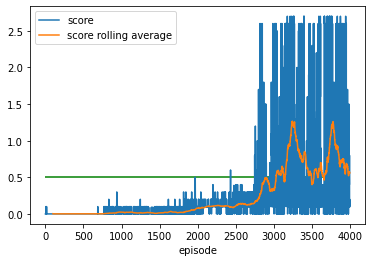

In [15]:
plot_results(np.max(np.vstack(player.all_scores), axis=1), window_size=100, target_score=0.5)

In [16]:
torch.save(online_value_network.state_dict(), 'online_value_network.pth')
torch.save(target_value_network.state_dict(), 'target_value_network.pth')
torch.save(online_policy_network.state_dict(), 'online_policy_network.pth')
torch.save(target_policy_network.state_dict(), 'target_policy_network.pth')